In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow import keras
import pickle

In [2]:
df = pd.read_excel('Datasets.xlsx')
df

,user_id,ayam-daging,ikan-seafood,tahu-tempe-telur,sayur,sambal,nasi-mie-pasta,sop-soto-bakso,kue-roti,jajanan-pasar,puding-jeli,keripik-kerupuk,buah-minuman
0,1,94,36,13,27,40,4,1,20,6,23,7,8
1,2,78,9,43,30,22,12,24,16,15,32,40,50
2,3,100,37,36,28,31,48,25,2,17,29,38,16
3,4,80,19,21,34,7,50,6,36,29,29,29,36
4,5,96,30,2,18,22,5,50,32,33,28,14,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12336,12337,27,32,47,28,26,33,42,48,16,17,23,93
12337,12338,21,1,49,46,2,24,13,39,35,25,5,70
12338,12339,20,41,27,14,23,4,8,37,10,18,5,91
12339,12340,37,33,18,50,15,44,48,33,27,33,33,99


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12341 entries, 0 to 12340
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   user_id           12341 non-null  int64
 1   ayam-daging       12341 non-null  int64
 2   ikan-seafood      12341 non-null  int64
 3   tahu-tempe-telur  12341 non-null  int64
 4   sayur             12341 non-null  int64
 5   sambal            12341 non-null  int64
 6   nasi-mie-pasta    12341 non-null  int64
 7   sop-soto-bakso    12341 non-null  int64
 8   kue-roti          12341 non-null  int64
 9   jajanan-pasar     12341 non-null  int64
 10  puding-jeli       12341 non-null  int64
 11  keripik-kerupuk   12341 non-null  int64
 12  buah-minuman      12341 non-null  int64
dtypes: int64(13)
memory usage: 1.2 MB


In [4]:
df.describe()

,user_id,ayam-daging,ikan-seafood,tahu-tempe-telur,sayur,sambal,nasi-mie-pasta,sop-soto-bakso,kue-roti,jajanan-pasar,puding-jeli,keripik-kerupuk,buah-minuman
count,12341.000000,12341.000000,12341.000000,12341.000000,12341.000000,12341.000000,12341.000000,12341.000000,12341.000000,12341.000000,12341.000000,12341.000000,12341.000000
mean,6171.000000,30.399724,30.331578,30.270481,30.546147,30.521838,30.313184,30.337898,30.210518,30.315534,30.316830,30.232639,32.096264
std,3562.684171,21.511998,21.489274,21.480814,21.494157,21.442897,21.520121,21.302926,21.427763,21.528887,21.393196,21.482836,23.081175
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3086.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,15.000000
50%,6171.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,27.000000,29.000000
75%,9256.000000,42.000000,41.000000,41.000000,42.000000,42.000000,41.000000,41.000000,41.000000,41.000000,41.000000,42.000000,43.000000
max,12341.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [5]:
scaler = StandardScaler()

In [6]:
df[['ayam-dagingT','ikan-seafoodT', 'tahu-tempe-telurT', 'sayurT','sambalT','nasi-mie-pastaT','sop-soto-baksoT','kue-rotiT','jajanan-pasarT','puding-jeliT','keripik-kerupukT','buah-minumanT']] = scaler.fit_transform(df[['ayam-daging','ikan-seafood', 'tahu-tempe-telur', 'sayur','sambal','nasi-mie-pasta','sop-soto-bakso','kue-roti','jajanan-pasar','puding-jeli','keripik-kerupuk','buah-minuman']])

In [7]:
df

,user_id,ayam-daging,ikan-seafood,tahu-tempe-telur,sayur,sambal,nasi-mie-pasta,sop-soto-bakso,kue-roti,jajanan-pasar,...,tahu-tempe-telurT,sayurT,sambalT,nasi-mie-pastaT,sop-soto-baksoT,kue-rotiT,jajanan-pasarT,puding-jeliT,keripik-kerupukT,buah-minumanT
0,1,94,36,13,27,40,4,1,20,6,...,-0.804028,-0.164989,0.442037,-1.222774,-1.377233,-0.476528,-1.129483,-0.342031,-1.081495,-1.044021
1,2,78,9,43,30,22,12,24,16,15,...,0.592624,-0.025410,-0.397436,-0.851014,-0.297525,-0.663209,-0.711423,0.078681,0.454677,0.775717
2,3,100,37,36,28,31,48,25,2,17,...,0.266738,-0.118462,0.022300,0.821907,-0.250581,-1.316594,-0.618521,-0.061556,0.361576,-0.697405
3,4,80,19,21,34,7,50,6,36,29,...,-0.431588,0.160695,-1.096997,0.914847,-1.142514,0.270197,-0.061108,-0.061556,-0.057380,0.169138
4,5,96,30,2,18,22,5,50,32,33,...,-1.316134,-0.583724,-0.397436,-1.176304,0.923014,0.083516,0.124696,-0.108302,-0.755640,0.039156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12336,12337,27,32,47,28,26,33,42,48,16,...,0.778844,-0.118462,-0.210887,0.124856,0.547463,0.830241,-0.664972,-0.622505,-0.336684,2.638783
12337,12338,21,1,49,46,2,24,13,39,35,...,0.871954,0.719008,-1.330184,-0.293374,-0.813907,0.410208,0.217599,-0.248539,-1.174596,1.642259
12338,12339,20,41,27,14,23,4,8,37,10,...,-0.152257,-0.769829,-0.350799,-1.222774,-1.048626,0.316867,-0.943679,-0.575759,-1.174596,2.552128
12339,12340,37,33,18,50,15,44,48,33,27,...,-0.571253,0.905113,-0.723898,0.636027,0.829126,0.130186,-0.154010,0.125427,0.128823,2.898745


In [8]:
df_input = df.drop(['user_id'], axis=1)

In [9]:
df_input

,ayam-daging,ikan-seafood,tahu-tempe-telur,sayur,sambal,nasi-mie-pasta,sop-soto-bakso,kue-roti,jajanan-pasar,puding-jeli,...,tahu-tempe-telurT,sayurT,sambalT,nasi-mie-pastaT,sop-soto-baksoT,kue-rotiT,jajanan-pasarT,puding-jeliT,keripik-kerupukT,buah-minumanT
0,94,36,13,27,40,4,1,20,6,23,...,-0.804028,-0.164989,0.442037,-1.222774,-1.377233,-0.476528,-1.129483,-0.342031,-1.081495,-1.044021
1,78,9,43,30,22,12,24,16,15,32,...,0.592624,-0.025410,-0.397436,-0.851014,-0.297525,-0.663209,-0.711423,0.078681,0.454677,0.775717
2,100,37,36,28,31,48,25,2,17,29,...,0.266738,-0.118462,0.022300,0.821907,-0.250581,-1.316594,-0.618521,-0.061556,0.361576,-0.697405
3,80,19,21,34,7,50,6,36,29,29,...,-0.431588,0.160695,-1.096997,0.914847,-1.142514,0.270197,-0.061108,-0.061556,-0.057380,0.169138
4,96,30,2,18,22,5,50,32,33,28,...,-1.316134,-0.583724,-0.397436,-1.176304,0.923014,0.083516,0.124696,-0.108302,-0.755640,0.039156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12336,27,32,47,28,26,33,42,48,16,17,...,0.778844,-0.118462,-0.210887,0.124856,0.547463,0.830241,-0.664972,-0.622505,-0.336684,2.638783
12337,21,1,49,46,2,24,13,39,35,25,...,0.871954,0.719008,-1.330184,-0.293374,-0.813907,0.410208,0.217599,-0.248539,-1.174596,1.642259
12338,20,41,27,14,23,4,8,37,10,18,...,-0.152257,-0.769829,-0.350799,-1.222774,-1.048626,0.316867,-0.943679,-0.575759,-1.174596,2.552128
12339,37,33,18,50,15,44,48,33,27,33,...,-0.571253,0.905113,-0.723898,0.636027,0.829126,0.130186,-0.154010,0.125427,0.128823,2.898745


In [10]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
    
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.ylabel('Inertias')
    plt.xlabel('Number of Clusters')
    plt.grid(True)
    plt.show()

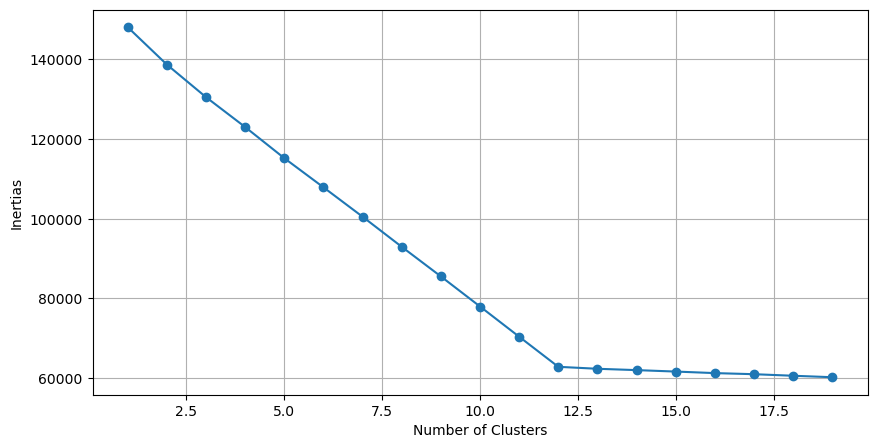

In [11]:
optimise_k_means(df_input[['ayam-dagingT','ikan-seafoodT', 'tahu-tempe-telurT', 'sayurT','sambalT','nasi-mie-pastaT','sop-soto-baksoT','kue-rotiT','jajanan-pasarT','puding-jeliT','keripik-kerupukT','buah-minumanT']], 20)

In [12]:
kmeans = KMeans(n_clusters=12)

In [13]:
kmeans.fit(df_input[['ayam-dagingT','ikan-seafoodT', 'tahu-tempe-telurT', 'sayurT','sambalT','nasi-mie-pastaT','sop-soto-baksoT','kue-rotiT','jajanan-pasarT','puding-jeliT','keripik-kerupukT','buah-minumanT']])

KMeans(n_clusters=12)

In [14]:
df_input['kmeans_12'] = kmeans.labels_

In [15]:
df_input

,ayam-daging,ikan-seafood,tahu-tempe-telur,sayur,sambal,nasi-mie-pasta,sop-soto-bakso,kue-roti,jajanan-pasar,puding-jeli,...,sayurT,sambalT,nasi-mie-pastaT,sop-soto-baksoT,kue-rotiT,jajanan-pasarT,puding-jeliT,keripik-kerupukT,buah-minumanT,kmeans_12
0,94,36,13,27,40,4,1,20,6,23,...,-0.164989,0.442037,-1.222774,-1.377233,-0.476528,-1.129483,-0.342031,-1.081495,-1.044021,1
1,78,9,43,30,22,12,24,16,15,32,...,-0.025410,-0.397436,-0.851014,-0.297525,-0.663209,-0.711423,0.078681,0.454677,0.775717,1
2,100,37,36,28,31,48,25,2,17,29,...,-0.118462,0.022300,0.821907,-0.250581,-1.316594,-0.618521,-0.061556,0.361576,-0.697405,1
3,80,19,21,34,7,50,6,36,29,29,...,0.160695,-1.096997,0.914847,-1.142514,0.270197,-0.061108,-0.061556,-0.057380,0.169138,1
4,96,30,2,18,22,5,50,32,33,28,...,-0.583724,-0.397436,-1.176304,0.923014,0.083516,0.124696,-0.108302,-0.755640,0.039156,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12336,27,32,47,28,26,33,42,48,16,17,...,-0.118462,-0.210887,0.124856,0.547463,0.830241,-0.664972,-0.622505,-0.336684,2.638783,2
12337,21,1,49,46,2,24,13,39,35,25,...,0.719008,-1.330184,-0.293374,-0.813907,0.410208,0.217599,-0.248539,-1.174596,1.642259,2
12338,20,41,27,14,23,4,8,37,10,18,...,-0.769829,-0.350799,-1.222774,-1.048626,0.316867,-0.943679,-0.575759,-1.174596,2.552128,2
12339,37,33,18,50,15,44,48,33,27,33,...,0.905113,-0.723898,0.636027,0.829126,0.130186,-0.154010,0.125427,0.128823,2.898745,2


In [16]:
df_input.describe()

,ayam-daging,ikan-seafood,tahu-tempe-telur,sayur,sambal,nasi-mie-pasta,sop-soto-bakso,kue-roti,jajanan-pasar,puding-jeli,...,sayurT,sambalT,nasi-mie-pastaT,sop-soto-baksoT,kue-rotiT,jajanan-pasarT,puding-jeliT,keripik-kerupukT,buah-minumanT,kmeans_12
count,12341.000000,12341.000000,12341.000000,12341.000000,12341.000000,12341.000000,12341.000000,12341.000000,12341.000000,12341.000000,...,1.234100e+04,1.234100e+04,1.234100e+04,1.234100e+04,1.234100e+04,1.234100e+04,1.234100e+04,1.234100e+04,1.234100e+04,12341.000000
mean,30.399724,30.331578,30.270481,30.546147,30.521838,30.313184,30.337898,30.210518,30.315534,30.316830,...,-1.624015e-15,-6.561300e-16,-7.931964e-16,1.587441e-15,-9.422547e-16,-1.506596e-15,-4.277161e-16,-4.941113e-15,1.170606e-15,5.406693
std,21.511998,21.489274,21.480814,21.494157,21.442897,21.520121,21.302926,21.427763,21.528887,21.393196,...,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,3.452219
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.374669e+00,-1.376821e+00,-1.362184e+00,-1.377233e+00,-1.363264e+00,-1.361739e+00,-1.370437e+00,-1.360799e+00,-1.347311e+00,0.000000
25%,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,-7.698286e-01,-7.705352e-01,-7.580740e-01,-7.669632e-01,-7.565500e-01,-7.578745e-01,-7.627421e-01,-7.556403e-01,-7.407317e-01,2.000000
50%,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,...,-1.184624e-01,-1.176119e-01,-1.074937e-01,-1.097498e-01,-1.031656e-01,-1.075591e-01,-1.083019e-01,-1.504815e-01,-1.341522e-01,5.000000
75%,42.000000,41.000000,41.000000,42.000000,42.000000,41.000000,41.000000,41.000000,41.000000,41.000000,...,5.329038e-01,5.353114e-01,4.966166e-01,5.005197e-01,5.035486e-01,4.963052e-01,4.993926e-01,5.477786e-01,4.724273e-01,8.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,3.231421e+00,3.240279e+00,3.238348e+00,3.270204e+00,3.257097e+00,3.236920e+00,3.257391e+00,3.247718e+00,2.942072e+00,11.000000


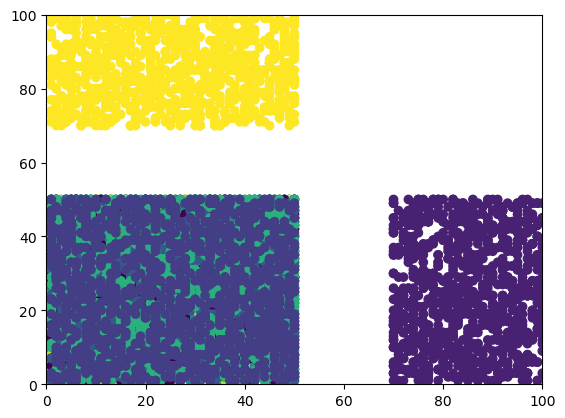

In [17]:
plt.scatter(x=df_input['ayam-daging'], y=df_input['ikan-seafood'], c=df_input['kmeans_12'])
plt.xlim(0,100)
plt.ylim(0, 100)
plt.show()

In [18]:
#df = pd.read_excel('Datasets.xlsx')
#df

In [19]:
#df_feature = df.drop('user_id', axis=1)

In [20]:
#scaler = StandardScaler()

In [21]:
#features = scaler.fit(df_feature)

In [22]:
#features = features.transform(df_feature)

In [23]:
#features

In [24]:
#train = tf.Variable(features)

In [25]:
#train

In [26]:
feature_df = df_input[['ayam-dagingT','ikan-seafoodT', 'tahu-tempe-telurT', 'sayurT','sambalT','nasi-mie-pastaT','sop-soto-baksoT','kue-rotiT','jajanan-pasarT','puding-jeliT','keripik-kerupukT','buah-minumanT','kmeans_12']]

In [27]:
feature_df

,ayam-dagingT,ikan-seafoodT,tahu-tempe-telurT,sayurT,sambalT,nasi-mie-pastaT,sop-soto-baksoT,kue-rotiT,jajanan-pasarT,puding-jeliT,keripik-kerupukT,buah-minumanT,kmeans_12
0,2.956622,0.263790,-0.804028,-0.164989,0.442037,-1.222774,-1.377233,-0.476528,-1.129483,-0.342031,-1.081495,-1.044021,1
1,2.212821,-0.992702,0.592624,-0.025410,-0.397436,-0.851014,-0.297525,-0.663209,-0.711423,0.078681,0.454677,0.775717,1
2,3.235548,0.310327,0.266738,-0.118462,0.022300,0.821907,-0.250581,-1.316594,-0.618521,-0.061556,0.361576,-0.697405,1
3,2.305796,-0.527335,-0.431588,0.160695,-1.096997,0.914847,-1.142514,0.270197,-0.061108,-0.061556,-0.057380,0.169138,1
4,3.049597,-0.015431,-1.316134,-0.583724,-0.397436,-1.176304,0.923014,0.083516,0.124696,-0.108302,-0.755640,0.039156,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12336,-0.158045,0.077643,0.778844,-0.118462,-0.210887,0.124856,0.547463,0.830241,-0.664972,-0.622505,-0.336684,2.638783,2
12337,-0.436970,-1.364996,0.871954,0.719008,-1.330184,-0.293374,-0.813907,0.410208,0.217599,-0.248539,-1.174596,1.642259,2
12338,-0.483458,0.496473,-0.152257,-0.769829,-0.350799,-1.222774,-1.048626,0.316867,-0.943679,-0.575759,-1.174596,2.552128,2
12339,0.306831,0.124180,-0.571253,0.905113,-0.723898,0.636027,0.829126,0.130186,-0.154010,0.125427,0.128823,2.898745,2


In [28]:
feature_df.shape

(12341, 13)

In [29]:
feature_df.to_excel('LabeledDatasets.xlsx')

In [30]:
feature_df = feature_df.sample(frac = 1)

In [31]:
X = feature_df.drop("kmeans_12", axis=1)
y = feature_df["kmeans_12"]

In [32]:
x_train , x_test, y_train,y_test = train_test_split(X,y, test_size=0.2)

In [33]:
x_train.shape

(9872, 12)

In [34]:
model = keras.models.Sequential()
model.add(keras.Input(shape=(12)))
model.add(layers.Dense(128))
model.add(layers.Dense(64))
model.add(layers.Dense(12))
model.build()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 12)                780       
                                                                 
Total params: 10,700
Trainable params: 10,700
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()
optim = keras.optimizers.Adam(learning_rate=0.001)
metrics = ["accuracy"]

In [36]:
model.compile(loss=loss, optimizer=optim, metrics=["accuracy"])

In [37]:
batch_size = 64
epochs = 20
model.fit(x_train,y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/20
155/155 [==============================] - 2s 4ms/step - loss: 1.3088 - accuracy: 0.8229
Epoch 2/20
155/155 [==============================] - 1s 4ms/step - loss: 0.1488 - accuracy: 0.9333
Epoch 3/20
155/155 [==============================] - 1s 4ms/step - loss: 0.0128 - accuracy: 0.9981
Epoch 4/20
155/155 [==============================] - 1s 4ms/step - loss: 7.8839e-04 - accuracy: 1.0000
Epoch 5/20
155/155 [==============================] - 1s 4ms/step - loss: 3.2303e-04 - accuracy: 1.0000
Epoch 6/20
155/155 [==============================] - 1s 4ms/step - loss: 2.7252e-04 - accuracy: 1.0000
Epoch 7/20
155/155 [==============================] - 1s 4ms/step - loss: 2.5939e-04 - accuracy: 1.0000
Epoch 8/20
155/155 [==============================] - 1s 4ms/step - loss: 2.5459e-04 - accuracy: 1.0000
Epoch 9/20
155/155 [==============================] - 1s 4ms/step - loss: 2.5364e-04 - accuracy: 1.0000
Epoch 10/20
155/155 [==============================] - 1s 5ms/step - loss: 2

In [38]:
loss = model.evaluate(x_test,y_test, verbose=0)
print(loss)

[0.0001550289016449824, 1.0]


In [40]:
pickle.dump(model, open("modelLabeledDatasetsV1.pkl", 'wb'))

INFO:tensorflow:Assets written to: ram://e8664382-0f62-474c-a44b-edc4deb45f2d/assets
